In [1]:
!unzip "/content/drive/MyDrive/trainSet.zip"

Streaming output truncated to the last 5000 lines.
 extracting: trainSet/f84aa25d-DM_Shining_Star_Regular-12px-italic-bold.png  
  inflating: trainSet/f84aab06-TH_Chakra_Petch-20px-normal-bold.png  
 extracting: trainSet/f84b6f46-Angsana_New-12px-normal-bold.png  
  inflating: trainSet/f84bf11a-TH_Mali_Grade6-14px-italic-bold.png  
  inflating: trainSet/f84bf30c-FC_Knomphing_Regular-24px-italic-normal.png  
  inflating: trainSet/f84cf1b6-TH_Charm_of_AU-20px-italic-bold.png  
 extracting: trainSet/f84d0367-fonttintin-12px-normal-normal.png  
 extracting: trainSet/f84d2d8a-TH_Sarabun-22px-italic-bold.png  
 extracting: trainSet/f84e0cd3-TH_Charm_of_AU-20px-normal-bold.png  
  inflating: trainSet/f84e0e65-Cordia_New-14px-normal-normal.png  
 extracting: trainSet/f84e5406-DM_Shining_Star_Regular-12px-italic-bold.png  
 extracting: trainSet/f84e9d4-FC_Knomphing_Regular-16px-normal-bold.png  
 extracting: trainSet/f84f2e07-TH_Charm_of_AU-16px-italic-bold.png  
  inflating: trainSet/f84f5303-

In [2]:
import os
from pathlib import Path
from os import listdir
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose

In [3]:
# Path to the data directory
data_dir1 = Path("/content/trainSet")
# Get list of all the images
images = listdir(data_dir1)
id=[]
text=[]
font=[]
size=[]
italic=[]
bold=[]

for img in images:
  id.append(img.split(".png")[0].split('-')[0])
  font.append(img.split(".png")[0].split('-')[1])
  size.append(img.split(".png")[0].split('-')[2])
  italic.append(img.split(".png")[0].split('-')[3])
  bold.append(img.split(".png")[0].split('-')[4])

print("Number of images found: ", len(id))

Number of images found:  156010


In [37]:
label=[]
for i in font:
  label.append(conv_label(i))

In [38]:
label

[0,
 3,
 6,
 7,
 4,
 5,
 1,
 1,
 0,
 7,
 5,
 8,
 5,
 3,
 9,
 2,
 4,
 5,
 1,
 5,
 5,
 5,
 2,
 0,
 5,
 2,
 3,
 9,
 3,
 4,
 9,
 5,
 2,
 4,
 7,
 4,
 7,
 7,
 0,
 0,
 7,
 2,
 9,
 6,
 7,
 7,
 2,
 7,
 8,
 0,
 2,
 0,
 9,
 5,
 5,
 1,
 9,
 0,
 6,
 4,
 6,
 1,
 3,
 4,
 4,
 8,
 2,
 1,
 1,
 5,
 5,
 6,
 9,
 0,
 9,
 7,
 2,
 9,
 9,
 5,
 3,
 0,
 5,
 7,
 4,
 2,
 4,
 4,
 6,
 8,
 8,
 7,
 4,
 8,
 3,
 0,
 3,
 3,
 3,
 8,
 4,
 6,
 4,
 4,
 7,
 6,
 6,
 9,
 8,
 9,
 0,
 8,
 2,
 3,
 2,
 8,
 4,
 2,
 4,
 7,
 5,
 5,
 2,
 3,
 4,
 4,
 6,
 1,
 6,
 0,
 1,
 4,
 0,
 7,
 9,
 9,
 4,
 9,
 1,
 5,
 8,
 4,
 7,
 4,
 0,
 9,
 1,
 3,
 8,
 0,
 6,
 6,
 8,
 7,
 8,
 3,
 5,
 9,
 0,
 8,
 0,
 1,
 3,
 7,
 2,
 4,
 4,
 7,
 5,
 2,
 5,
 0,
 6,
 2,
 3,
 0,
 4,
 4,
 9,
 3,
 7,
 5,
 6,
 0,
 5,
 4,
 4,
 0,
 2,
 4,
 0,
 9,
 9,
 4,
 2,
 8,
 9,
 3,
 7,
 9,
 1,
 0,
 9,
 3,
 3,
 8,
 4,
 5,
 4,
 5,
 6,
 4,
 2,
 2,
 6,
 8,
 8,
 9,
 3,
 8,
 8,
 9,
 4,
 6,
 4,
 5,
 6,
 3,
 5,
 0,
 7,
 8,
 8,
 2,
 0,
 6,
 2,
 3,
 5,
 8,
 6,
 6,
 5,
 0,
 5,
 5,
 2,
 9,
 5,
 1,


AttributeError: ignored

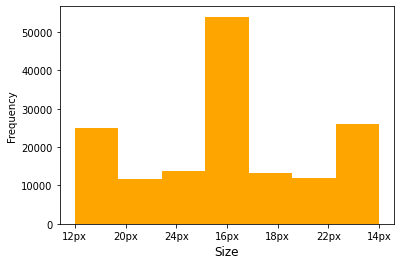

In [43]:
plt.hist(size, 7,color = "orange")
plt.xlabel('Size', fontsize=12)
plt.ylabel('Frequency',fonsize =12)

In [ ]:
import pandas as pd

In [ ]:
data ={'Id':id, 'Font':font,'italic':italic,'bold':bold}

In [ ]:
df = pd.DataFrame(data)

In [4]:
import tensorflow as tf
import keras
from keras import utils
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def conv_label(label):
    if label == '12px':
        return 0
    elif label == '14':
        return 1
    elif label == '16px':
        return 2
    elif label == '18px':
        return 3
    elif label == '20px':
        return 4
    elif label == 'Kunlasatri':
        return 5
    elif label == 'TH_Chakra_Petch':
        return 6

In [23]:
def conv_labelitalic(label):
    if label == 'normal':
        return 0
    elif label == 'italic':
        return 1

In [18]:
def conv_labelbold(label):
    if label == 'normal':
        return 0
    elif label == 'bold':
        return 1

In [10]:
def conv_label(label):
    if label == 'Angsana_New':
        return 0
    elif label == 'Cordia_New':
        return 1
    elif label == 'DM_Shining_Star_Regular':
        return 2
    elif label == 'FC_Knomphing_Regular':
        return 3
    elif label == 'fonttintin':
        return 4
    elif label == 'Kunlasatri':
        return 5
    elif label == 'TH_Chakra_Petch':
        return 6
    elif label == 'TH_Charm_of_AU':
        return 7
    elif label == 'TH_Mali_Grade6':
        return 8
    elif label == 'TH_Sarabun':
        return 9

In [ ]:
data=[]
labels=[]
for img in images:
  img2 = cv2.imread("/content/trainSet/"+img)
  #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  threshold, binarizedImage = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  #binarizedImage = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
  img_height=100
  img_width=100
  dim=(img_height,img_width)
  resized = cv2.resize(binarizedImage, dim)
  data.append(resized)
  label = img.split(".png")[0].split('-')[1]
  labels.append(conv_label(label))

In [ ]:
data1=np.array(data)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, labels, test_size=0.20, random_state=42,stratify=labels)

In [ ]:
X_train = X_train.astype('float32')
X_train/=255
X_train = X_train.reshape(124808, 100, 100,1)

X_test = X_test.astype('float32')
X_test/=255
X_test = X_test.reshape(31202, 100, 100,1)

In [ ]:
Y_train= tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,weights= 'imagenet',input_shape= (100,100,3))

94781440/94765736 [==============================] - 4s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
from tensorflow.keras import layers, Model

In [ ]:
x_in = keras.layers.Input(shape=(100, 100, 1))
x = keras.layers.Conv2D(3, 1)(x_in)
x = resnet(x)
# fit output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(10, activation='softmax')(x)
model = Model(x_in, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 3)       6         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 10)                327690    
                                                                 
Total params: 23,915,408
Trainable params: 23,862,288
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.CategoricalCrossentropy(),metrics=[keras.metrics.CategoricalAccuracy()])
model.fit(X_train, Y_train, batch_size=32 ,epochs=7, validation_data=(X_test,Y_test))

Epoch 1/7
3901/3901 [==============================] - 279s 68ms/step - loss: 0.6505 - categorical_accuracy: 0.7905 - val_loss: 0.3508 - val_categorical_accuracy: 0.8832
Epoch 2/7
3901/3901 [==============================] - 265s 68ms/step - loss: 0.1885 - categorical_accuracy: 0.9332 - val_loss: 0.2291 - val_categorical_accuracy: 0.9217
Epoch 3/7
3901/3901 [==============================] - 263s 67ms/step - loss: 0.0957 - categorical_accuracy: 0.9658 - val_loss: 0.2361 - val_categorical_accuracy: 0.9258
Epoch 4/7
3901/3901 [==============================] - 262s 67ms/step - loss: 0.0589 - categorical_accuracy: 0.9794 - val_loss: 0.1912 - val_categorical_accuracy: 0.9402
Epoch 5/7
3901/3901 [==============================] - 262s 67ms/step - loss: 0.0386 - categorical_accuracy: 0.9872 - val_loss: 0.1563 - val_categorical_accuracy: 0.9526
Epoch 6/7
3901/3901 [==============================] - 262s 67ms/step - loss: 0.0271 - categorical_accuracy: 0.9913 - val_loss: 0.1509 - val_categoric

In [ ]:
model.save('/content/drive/MyDrive/MiniHackathon/'+'modelfont.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
!unzip "/content/drive/MyDrive/testSet.zip"

Streaming output truncated to the last 5000 lines.
  inflating: testSet/e51a1f38.png    
  inflating: testSet/e51ab4ff.png    
 extracting: testSet/e51bdee5.png    
  inflating: testSet/e51dd80b.png    
  inflating: testSet/e520d1e5.png    
  inflating: testSet/e522d413.png    
  inflating: testSet/e524a3e2.png    
  inflating: testSet/e524f9f0.png    
  inflating: testSet/e5256e0d.png    
 extracting: testSet/e5270cff.png    
  inflating: testSet/e5281456.png    
  inflating: testSet/e529eb6f.png    
  inflating: testSet/e52b02cb.png    
 extracting: testSet/e52cd195.png    
 extracting: testSet/e52ceb52.png    
 extracting: testSet/e52fed5e.png    
 extracting: testSet/e53031a0.png    
 extracting: testSet/e533dae8.png    
  inflating: testSet/e53477f3.png    
 extracting: testSet/e536c36c.png    
  inflating: testSet/e5372850.png    
 extracting: testSet/e53a40ba.png    
  inflating: testSet/e53aab46.png    
 extracting: testSet/e53d508f.png    
 extracting: testSet/e53e4d5e.png    

In [ ]:
# Path to the data directory
data_dir2 = Path("/content/testSet")
# Get list of all the images
images = listdir(data_dir2)

In [ ]:
data=[]
solution=[]
id=[]

for img in images:
  img2 = cv2.imread("/content/trainSet/"+img)
  #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  threshold, binarizedImage = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  #binarizedImage = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
  img_height=100
  img_width=100
  dim=(img_height,img_width)
  resized = cv2.resize(binarizedImage, dim)
  result = model.predict(resized)
  print(result)
  solution.append(result)
  id.append(img.split(".png")[0].split('-')[0])

SyntaxError: ignored

In [ ]:
maxindex = numpy.argmax(list1)